In [ ]:
pip install kaggle

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c alaska2-image-steganalysis

100% 30.0G/30.0G [05:57<00:00, 98.6MB/s]
100% 30.0G/30.0G [05:57<00:00, 90.1MB/s]


In [5]:
from zipfile import ZipFile
dataset = '/content/alaska2-image-steganalysis.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
import os
import skimage.io as sk
import matplotlib.pyplot as plt
from scipy import spatial
from tqdm import tqdm
from PIL import Image
from random import shuffle


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [6]:
train_imageids = pd.Series(os.listdir('/content/Cover/')).sort_values(ascending=True).reset_index(drop=True)
test_imageids = pd.Series(os.listdir('/content/Test/')).sort_values(ascending=True).reset_index(drop=True)

In [7]:
cover_images_path = pd.Series('/content/Cover/' + train_imageids ).sort_values(ascending=True)
JMIPOD_images_path = pd.Series('/content/JMiPOD/'+train_imageids).sort_values(ascending=True)
JUNIWARD_images_path = pd.Series('/content/JUNIWARD/'+train_imageids).sort_values(ascending=True)
UERD_images_path = pd.Series('/content/UERD/'+train_imageids).sort_values(ascending=True)
test_images_path = pd.Series('/content/Test/'+test_imageids).sort_values(ascending=True)
ss = pd.read_csv(f'/content/sample_submission.csv')

In [ ]:
import cv2
import numpy as np

def extract_LSB(image_path, num_bits=1):
    # Load the image
    img = cv2.imread(image_path)

    # Extract hidden data from the LSB of the blue channel
    hidden_data = ''
    for row in img:
        for pixel in row:
            hidden_data += format(pixel[0], f'0{num_bits}b')[-num_bits:]

    # Convert binary data to ASCII characters
    hidden_text = ''.join([chr(int(hidden_data[i:i+8], 2)) for i in range(0, len(hidden_data), 8)])

    return hidden_text

# Example usage
image_path = '/content/JMiPOD/00011.jpg'
extracted_data = extract_LSB(image_path)
print(f'Extracted Hidden Data: {extracted_data}')

Sÿ.o¯] 	ïçê À$À"     ÿð üÀ ÿøL`~~ À><   1¬OiXElÃ_üÄÊR¿Í£K«Þþàÿ" <ð ? ÿøàüà ÿ À0~ÿ Àä'ð>  q·+²ÃÃ°qJRg7oÒ}b®íCÃÎÿÞx? 9?  w Ãááü  7Dàù`?Üÿ áÿ
ÓIñpð'sÈþÇüÃàÌàáÿsÿ ðøüã1î9ÿÀÃø"~ÿçåÿ|.l::ß mpé*)K¼ÙdúüÇð~f0Àâÿóÿ ðÿþw1þÿÁÃð0~ÿ$Tÿ®Ê&®Î8Mõÿ1Lö­_«5%£xü Çóf3 ù?ðÿÿà þ üÃÃÀ~<?0é oPB7£ÉáÅ;>G0Õ1cáçÂ?|ÇðZ3 ìùàþ÷ÿÏüÃÀç ðÀ°hàîze0*TECfsÚ·Â®×cJ ?<|ÇÿÛ\X ñ³øð;ÿãÀÿ?ÏüÀ8ÃØ	Àÿÿ?p~¾ãscî¨ÐcÔxêròtoW»¶NÀà<øÇø?¬q¢øð;á?ÿüÈüÃÝ<à¯Ã 3øØ£«1Ùû·1#ÆÚ:?Y÷Dµüü<øÇác×À&øø9ðàÿóøØÃÃÝ× 0X<7ÛÅX°\Ýó çkli7»²Qc7wÂ,àÿõHç84üø?Ïÿ ðqàèÿ¼ ûãþ²£±Ìw'²üÆâáLabô2àÿõÜÃÃÇx?Ïÿ<øqàÿèÿó  ùð0Àÿ À3¢"?_ ±»FÈ°WÏø&Yõ¾zÀöqø
?ü`ÿÿxqãcüÿü  àÇÿãàð  ^£4Ð§EAËæ5:BÙzÝé6Ô3ß½LÀ~#<ÿÏö?ø0ÿÃ3Ç#ßÿü ÈÃ8ðÁàáÿ=^ã?fÝèÒËW?×àúY~Õ%>¢>0ÀÇL8<ÿ@ýà?üÿÃ3Ç#ÿx ØÃððÀÆÃ¼Åúvõq(,ÌÏM»¼Õ38/¹O²÷Ç?pÿÈú0?Ã²Îcÿ<   C2øÇàÿÄCÔ

In [10]:
# List the contents of the dataset directory
dataset_dir = '/content/Cover'
print(os.listdir(dataset_dir))


['77245.jpg', '36943.jpg', '58974.jpg', '28973.jpg', '27855.jpg', '46515.jpg', '17263.jpg', '19727.jpg', '21858.jpg', '17071.jpg', '03723.jpg', '24425.jpg', '47981.jpg', '79714.jpg', '35982.jpg', '04660.jpg', '42069.jpg', '05815.jpg', '58114.jpg', '62816.jpg', '01627.jpg', '54843.jpg', '54619.jpg', '63756.jpg', '64686.jpg', '24355.jpg', '56082.jpg', '35162.jpg', '74886.jpg', '10671.jpg', '04826.jpg', '39408.jpg', '41082.jpg', '76525.jpg', '79966.jpg', '32637.jpg', '03952.jpg', '14306.jpg', '22185.jpg', '02508.jpg', '40727.jpg', '55715.jpg', '68938.jpg', '42225.jpg', '16864.jpg', '58324.jpg', '09363.jpg', '39910.jpg', '77313.jpg', '47431.jpg', '57366.jpg', '74046.jpg', '76674.jpg', '22139.jpg', '57673.jpg', '71875.jpg', '08438.jpg', '56903.jpg', '09929.jpg', '37826.jpg', '05559.jpg', '00594.jpg', '13115.jpg', '34350.jpg', '17582.jpg', '21308.jpg', '60526.jpg', '78435.jpg', '76064.jpg', '17546.jpg', '63536.jpg', '01829.jpg', '46864.jpg', '77160.jpg', '27851.jpg', '16599.jpg', '04656.jpg'

In [17]:
cover_image = cv2.imread('/content/Cover/0011.jpg', cv2.IMREAD_GRAYSCALE)
stego_image = cv2.imread('/content/JMiPOD/00011.jpg', cv2.IMREAD_GRAYSCALE)

In [18]:
# Calculate histograms
hist_cover = cv2.calcHist([cover_image], [0], None, [256], [0, 256])
hist_stego = cv2.calcHist([stego_image], [0], None, [256], [0, 256])

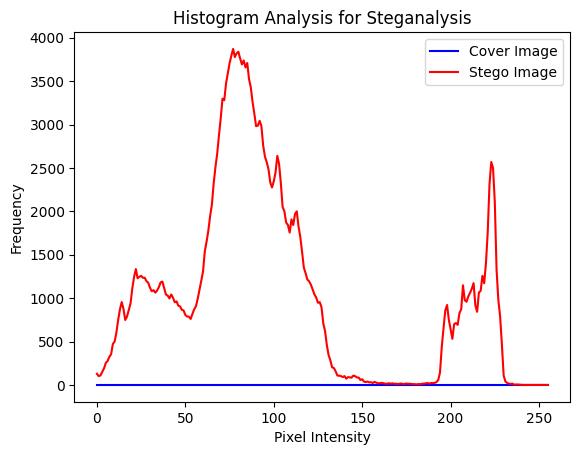

In [19]:
# Plot histograms
plt.plot(hist_cover, color='blue', label='Cover Image')
plt.plot(hist_stego, color='red', label='Stego Image')
plt.title('Histogram Analysis for Steganalysis')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [20]:
import os
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from skimage import exposure

# Function to extract simple statistical features
def extract_simple_features(image):
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate basic statistical features
    mean_intensity = np.mean(gray_img)
    std_intensity = np.std(gray_img)
    median_intensity = np.median(gray_img)

    # Flatten the image matrix to a 1D array
    flat_img = gray_img.flatten()

    # Additional statistical features can be added based on your requirements

    # Combine features
    features = np.array([mean_intensity, std_intensity, median_intensity] + flat_img.tolist())

    return features


In [22]:

# List all image files in the directories
cover_images = [os.path.join(cover_path, img) for img in os.listdir(cover_path) if img.endswith('.jpg')][:300]
stego_images = [os.path.join(stego_path, img) for img in os.listdir(stego_path) if img.endswith('.jpg')][:300]


In [23]:
cover_features = []
cover_labels = []
for cover_image_path in cover_images:
    cover_image = cv2.imread(cover_image_path)
    features = extract_simple_features(cover_image)
    cover_features.append(features)
    cover_labels.append(0)

In [24]:
# Load and extract features for stego images
stego_features = []
stego_labels = []
for stego_image_path in stego_images:
    stego_image = cv2.imread(stego_image_path)
    features = extract_simple_features(stego_image)
    stego_features.append(features)
    stego_labels.append(1)  # 1 represents stego

In [25]:
from tensorflow.keras.preprocessing.image import img_to_array

default_image_size = tuple((255, 255))

def convert_image_to_array(image_dir):
    image = cv2.imread(image_dir)
    if image is not None:
        image = cv2.resize(image, default_image_size)
        return img_to_array(image)

image_array_list, label_list = [], []
image_folders = ["Cover", "JMiPOD"]

for folder in image_folders:
    image_list = os.listdir(f"/content/{folder}")
    for image_name in image_list[:300]:  # Limit to 300 images
        if image_name.endswith(".jpg"):
            image_path = f"/content/{folder}/{image_name}"
            image_array_list.append(convert_image_to_array(image_path))
            label_list.append(folder)

print("Number of unique labels:", len(np.unique(np.asarray(label_list))))


Number of unique labels: 2


In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
image_labels = lb.fit_transform(label_list)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(np.array(image_array_list), image_labels, test_size=0.3, random_state = 42)

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
# Load pre-trained ResNet50 model
import tensorflow as tf
base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(255, 255, 3))


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import os
import cv2
import numpy as np


x = Flatten()(base_model.output)
# Add a Dense layer for binary classification
output = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Create a new model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Epoch 1/10
14/14 [==============================] - 446s 30s/step - loss: 3.9271 - accuracy: 0.4000 - val_loss: 406535.7188 - val_accuracy: 0.4556
Epoch 2/10
14/14 [==============================] - 411s 29s/step - loss: 2.8153 - accuracy: 0.4857 - val_loss: 26603.3574 - val_accuracy: 0.4556
Epoch 3/10
14/14 [==============================] - 414s 30s/step - loss: 3.4372 - accuracy: 0.4762 - val_loss: 2789.4910 - val_accuracy: 0.4556
Epoch 4/10
14/14 [==============================] - 409s 29s/step - loss: 2.5747 - accuracy: 0.5238 - val_loss: 72894.2891 - val_accuracy: 0.4556
Epoch 5/10
14/14 [==============================] - 594s 43s/step - loss: 2.3448 - accuracy: 0.4833 - val_loss: 1353.7933 - val_accuracy: 0.4556
Epoch 6/10
14/14 [==============================] - 408s 29s/step - loss: 1.4287 - accuracy: 0.5119 - val_loss: 1274.5261 - val_accuracy: 0.4556
Epoch 7/10
14/14 [==============================] - 409s 29s/step - loss: 1.5281 - accuracy: 0.5119 - val_loss: 4214.0151 - va

In [ ]:
# Combine features and labels
X = np.vstack([cover_features, stego_features])
y = np.hstack([cover_labels, stego_labels])

from sklearn.impute import SimpleImputer
# Handle NaN values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [ ]:
# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.08
Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.15      0.14        62
           1       0.02      0.02      0.02        58

    accuracy                           0.08       120
   macro avg       0.08      0.08      0.08       120
weighted avg       0.08      0.08      0.08       120



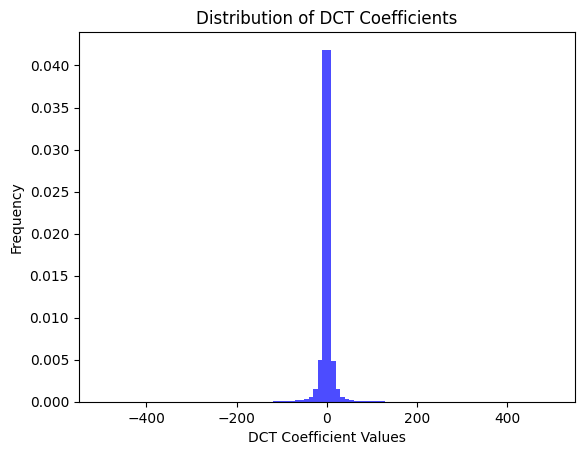

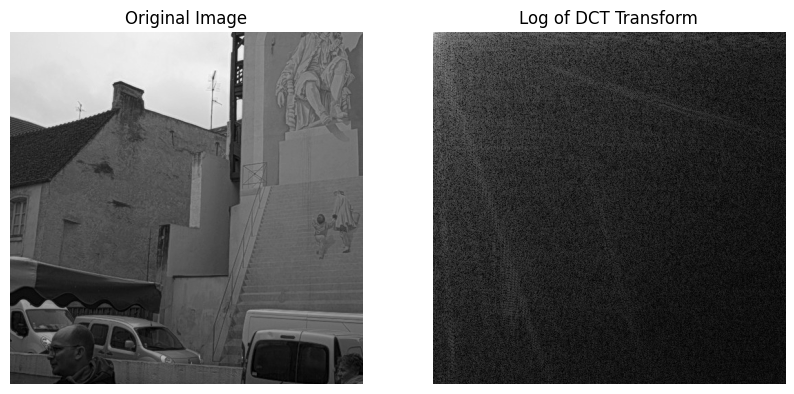

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to perform DCT coefficient analysis
def dct_coefficient_analysis(image_path):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply DCT to the image
    dct_result = cv2.dct(np.float32(img))

    # Flatten the DCT coefficients for analysis
    flat_dct = dct_result.flatten()

    # Plot the distribution of DCT coefficients
    plt.hist(flat_dct, bins=100, range=[-500, 500], density=True, color='blue', alpha=0.7)
    plt.title('Distribution of DCT Coefficients')
    plt.xlabel('DCT Coefficient Values')
    plt.ylabel('Frequency')
    plt.show()

    # Display the original and DCT-transformed images (for illustration purposes)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(np.log(np.abs(dct_result) + 1), cmap='gray')
    plt.title('Log of DCT Transform')
    plt.axis('off')

    plt.show()

# Example usage
image_path = '/content/Cover/00011.jpg'
dct_coefficient_analysis(image_path)

In [34]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import shuffle


In [27]:

# Function to extract simple statistical features
def extract_simple_features(image):
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mean_intensity = np.mean(gray_img)
    std_intensity = np.std(gray_img)
    median_intensity = np.median(gray_img)
    flat_img = gray_img.flatten()
    features = np.array([mean_intensity, std_intensity, median_intensity] + flat_img.tolist())
    return features


In [28]:
# Set the paths to cover and stego images in the ALASKA2 dataset
cover_path = '/content/Cover'
stego_path = '/content/JMiPOD'

# List all image files in the directories
cover_images = [os.path.join(cover_path, img) for img in os.listdir(cover_path) if img.endswith('.jpg')][:100]
stego_images = [os.path.join(stego_path, img) for img in os.listdir(stego_path) if img.endswith('.jpg')][:100]


In [29]:

# Load and preprocess images
def load_and_preprocess_images(image_paths, target_size=(256, 256)):
    images = []
    for image_path in image_paths:
        image = cv2.imread(image_path)
        image = cv2.resize(image, target_size)
        images.append(image)
    return np.array(images)

cover_images = load_and_preprocess_images(cover_images)
stego_images = load_and_preprocess_images(stego_images)

In [30]:
# Extract features for cover images
cover_features = []
cover_labels = []
for cover_image in cover_images:
    features = extract_simple_features(cover_image)
    cover_features.append(features)
    cover_labels.append(0)  # 0 represents cover



In [31]:
# Extract features for stego images
stego_features = []
stego_labels = []
for stego_image in stego_images:
    features = extract_simple_features(stego_image)
    stego_features.append(features)
    stego_labels.append(1)  # 1 represents stego

In [35]:

# Combine features and labels
X = np.vstack([cover_features, stego_features])
y = np.hstack([cover_labels, stego_labels])

# Shuffle the data
X, y = shuffle(X, y, random_state=42)


In [36]:
# Handle NaN values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [38]:
# Define the Neural Network model
model = Sequential()
model.add(Dense(128, input_shape=(X_scaled.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

4/4 [==============================] - 1s 160ms/step - loss: 10.9792 - accuracy: 0.5156 - val_loss: 15.8261 - val_accuracy: 0.3750
Epoch 2/50
4/4 [==============================] - 0s 106ms/step - loss: 12.7713 - accuracy: 0.4766 - val_loss: 16.2011 - val_accuracy: 0.2500
Epoch 3/50
4/4 [==============================] - 0s 104ms/step - loss: 9.8683 - accuracy: 0.5234 - val_loss: 22.4084 - val_accuracy: 0.2812
Epoch 4/50
4/4 [==============================] - 0s 111ms/step - loss: 10.2983 - accuracy: 0.5625 - val_loss: 23.7829 - val_accuracy: 0.1875


In [ ]:
# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Apply threshold (0.5 in this case)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 11ms/step
Accuracy: 0.38
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.18      0.24        22
           1       0.38      0.61      0.47        18

    accuracy                           0.38        40
   macro avg       0.37      0.40      0.36        40
weighted avg       0.37      0.38      0.34        40



In [ ]:
# importing the libraries
from PIL import Image
import numpy as np
import os
import cv2

In [ ]:
# List the contents of the dataset directory
dataset_dir = '/content/Cover'
hidden_dir = '/content/JMiPOD'

In [ ]:
# Load and Display an Image
image_path = os.path.join(dataset_dir, 'Cover', '/content/Cover/00001.jpg')  # Replace with the path to an image in the dataset
#img = cv2.imread(image_path)

In [ ]:
# Load and Display an Image
hidden_path = os.path.join(hidden_dir, 'JMiPOD', '/content/JMiPOD/00001.jpg')  # Replace with the path to an image in the dataset
#hidden_img = cv2.imread(hidden_path)

In [ ]:
# Function to perform Pixel Value Differencing
def pixel_value_differencing(image_path, hidden_path):
    # Load images
    image = Image.open(image_path)
    hidden_image = Image.open(hidden_path)

    # Convert images to numpy arrays for pixel manipulation
    original_array = np.array(image)
    altered_array = np.array(hidden_image)

    # Calculate pixel-wise absolute differences
    diff_array = np.abs(original_array - altered_array)

    # Calculate the average pixel difference across channels
    avg_diff = np.mean(diff_array)

    return avg_diff

In [ ]:
# Perform Pixel Value Differencing
average_pixel_diff = pixel_value_differencing(image_path, hidden_path)
print(f"Average pixel difference: {average_pixel_diff}")

Average pixel difference: 48.0799446105957


Color Histograms

In [ ]:
# import libraries
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
# List the contents of the dataset directory
dir = '/content/JMiPOD'

In [ ]:
# Load and Display an Image
image_path = os.path.join(dir, 'JMiPOD', '/content/JMiPOD/00001.jpg')  # Replace with the path to an image in the dataset
img = cv2.imread(image_path)

In [ ]:
# Convert to RGB
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
# Calculate histograms for each channel (RGB)
hist_r = cv2.calcHist([image_rgb], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([image_rgb], [1], None, [256], [0, 256])
hist_b = cv2.calcHist([image_rgb], [2], None, [256], [0, 256])

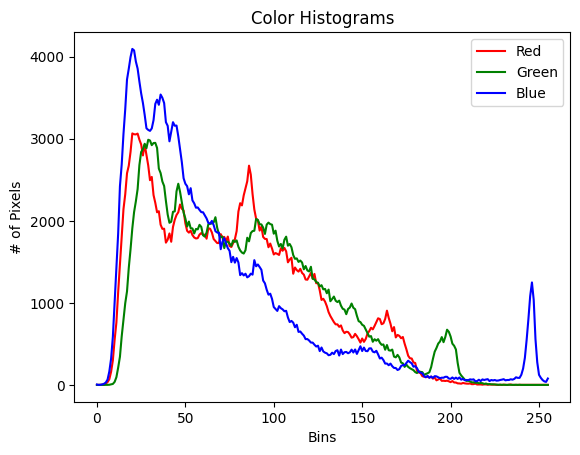

In [ ]:
# Plot histograms
plt.figure()
plt.title('Color Histograms')
plt.xlabel('Bins')
plt.ylabel('# of Pixels')
plt.plot(hist_r, color='r', label='Red')
plt.plot(hist_g, color='g', label='Green')
plt.plot(hist_b, color='b', label='Blue')
plt.legend()
plt.show()

Statistical Methods

In [ ]:
import numpy as np

In [ ]:
# Convert to grayscale
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
# Calculate statistical moments
mean = np.mean(gray_image)
variance = np.var(gray_image)
skewness = np.mean(((gray_image - mean) / np.std(gray_image)) ** 3)
kurtosis = np.mean(((gray_image - mean) / np.std(gray_image)) ** 4)

In [ ]:
print('Mean: ',mean )
print('Variance: ', variance)
print('Skewness: ',skewness)
print('Kurtosis: ', kurtosis)

Mean:  78.28190231323242
Variance:  2068.3200328863313
Skewness:  0.6736252379237891
Kurtosis:  2.8051096967559856


In [ ]:
# Load and Display an Image
original_dir = '/content/Cover'
original_path = os.path.join(original_dir, 'Cover', '/content/Cover/00001.jpg')  # Replace with the path to an image in the dataset
original_img = cv2.imread(original_path)

In [ ]:
# Convert images to grayscale
original_gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

In [ ]:
# Calculate statistical moments for both images
original_mean = np.mean(original_gray)
altered_mean = np.mean(image_rgb)

In [ ]:
original_variance = np.var(original_gray)
altered_variance = np.var(image_rgb)

In [ ]:
# Compare statistical moments for anomaly detection
mean_difference = abs(original_mean - altered_mean)
variance_difference = abs(original_variance - altered_variance)

In [ ]:
# Define thresholds for anomaly detection
mean_threshold = 5  # Example threshold for mean difference
variance_threshold = 10  # Example threshold for variance difference

In [ ]:
# Detect anomalies indicating alterations
if mean_difference > mean_threshold or variance_difference > variance_threshold:
    print("Possible alterations indicating hidden data.")
else:
    print("No significant alterations detected.")

Possible alterations indicating hidden data.


Texture Features

In [ ]:
from skimage.filters import gabor

In [ ]:
# Apply Gabor filter
theta = 0  # Orientation of the Gabor filter
frequency = 0.6  # Frequency of the Gabor filter
gabor_filter_response = gabor(gray_image, frequency, theta=theta)[0]

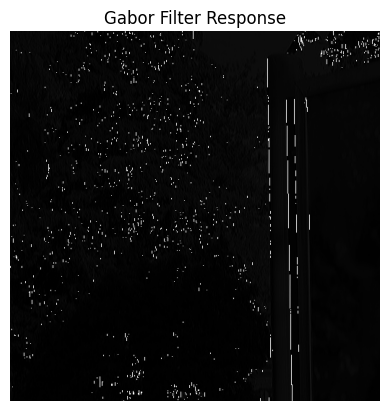

In [ ]:
# Display Gabor filter response
plt.figure()
plt.title('Gabor Filter Response')
plt.imshow(gabor_filter_response, cmap='gray')
plt.axis('off')
plt.show()

### Deep Learning Features (using Pre-trained VGG16)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image as keras_image

In [ ]:
# Load the VGG16 model pre-trained on ImageNet
model = VGG16(weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
img = keras_image.load_img(image_path, target_size=(224, 224))
x = keras_image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
# Get features from VGG16
features = model.predict(x)

1/1 [==============================] - 1s 599ms/step




```
# This is formatted as code
```

### Wavelet Transform

In [ ]:
import pywt

In [ ]:
# Apply 2D wavelet transform (e.g., using Haar wavelet)
coeffs = pywt.dwt2(gray_image, 'haar')

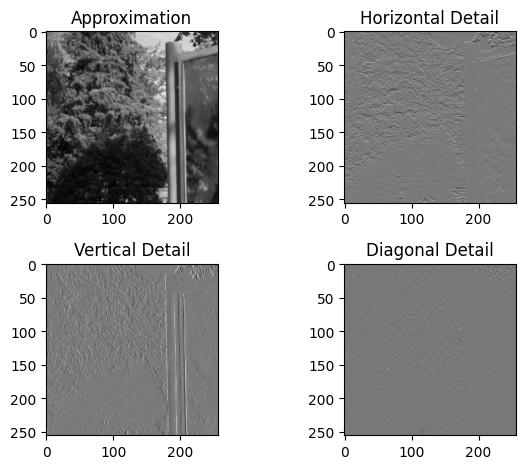

In [ ]:
# Display approximation and detail coefficients
approx, (cH, cV, cD) = coeffs
plt.figure()
plt.subplot(221), plt.imshow(approx, cmap='gray'), plt.title('Approximation')
plt.subplot(222), plt.imshow(cH, cmap='gray'), plt.title('Horizontal Detail')
plt.subplot(223), plt.imshow(cV, cmap='gray'), plt.title('Vertical Detail')
plt.subplot(224), plt.imshow(cD, cmap='gray'), plt.title('Diagonal Detail')
plt.tight_layout()
plt.show()

FFT

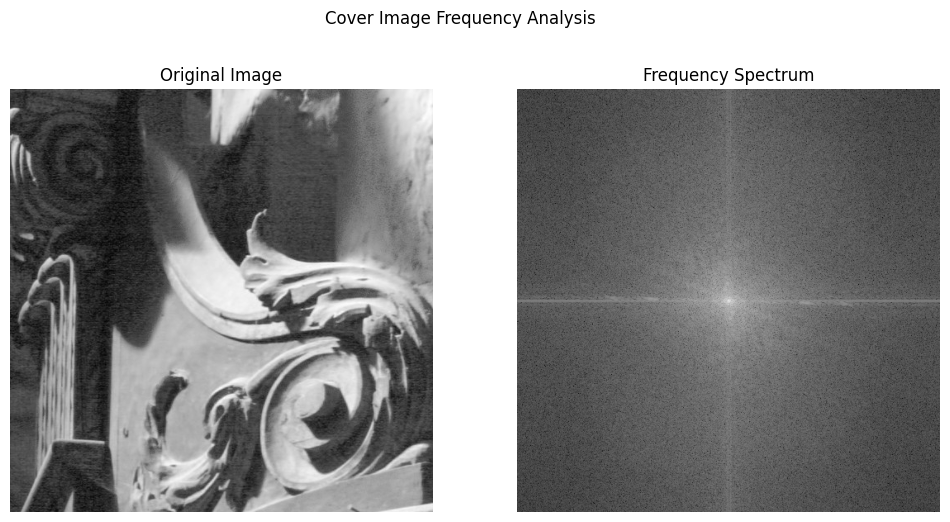

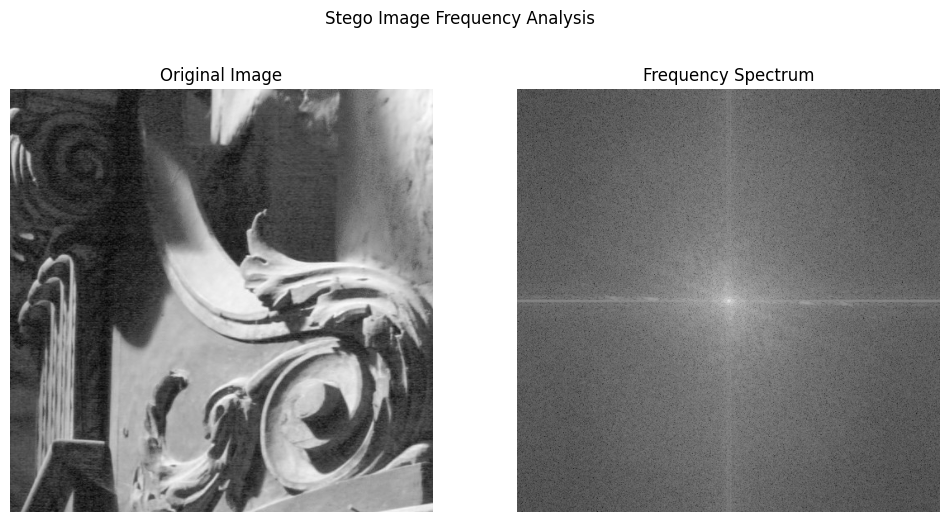

In [ ]:
import os
import cv2
import numpy as np
from scipy.fftpack import fft2, ifft2
import matplotlib.pyplot as plt

# Function to perform FFT and visualize the frequency spectrum
def visualize_frequency_spectrum(image, title):
    # Perform FFT
    f_transform = fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Calculate magnitude spectrum
    magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)

    # Display the original image and its frequency spectrum
    plt.figure(figsize=(12, 6))

    plt.subplot(121), plt.imshow(image, cmap='gray')
    plt.title('Original Image'), plt.axis('off')

    plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Frequency Spectrum'), plt.axis('off')

    plt.suptitle(title)
    plt.show()

# Set the paths to cover and stego images in the ALASKA2 dataset
cover_path = '/content/Cover'
stego_path = '/content/JMiPOD'

# Choose one cover and one stego image for analysis
cover_image_path = os.path.join(cover_path, os.listdir(cover_path)[8])
stego_image_path = os.path.join(stego_path, os.listdir(stego_path)[8])

# Load images
cover_image = cv2.imread(cover_image_path, cv2.IMREAD_GRAYSCALE)
stego_image = cv2.imread(stego_image_path, cv2.IMREAD_GRAYSCALE)

# Visualize frequency spectrum for cover image
visualize_frequency_spectrum(cover_image, 'Cover Image Frequency Analysis')

# Visualize frequency spectrum for stego image
visualize_frequency_spectrum(stego_image, 'Stego Image Frequency Analysis')


In [ ]:
#visual inspection

In [ ]:
def visual_inspection(image_path):
    # Load image
    img = Image.open(image_path)

    # Perform visual inspection or comparison with original images
    # Look for any visible changes or artifacts that may indicate hidden data
    # This can include discrepancies in colors, patterns, or unusual artifacts

    # For example, display the image and observe visually
    img.show()

In [ ]:
#lsb extraction

In [ ]:
from PIL import Image
import numpy as np

def lsb_extraction(image_path):
    # Load image
    img = Image.open(image_path)
    img_array = np.array(img)

    # Extract LSBs
    hidden_data = ''
    for row in img_array:
        for pixel in row:
            # Extract LSB from each color channel (R, G, B)
            for channel in pixel:
                hidden_data += bin(channel)[-1]

    # Convert binary string to bytes and decode
    hidden_message = ''.join(chr(int(hidden_data[i:i+8], 2)) for i in range(0, len(hidden_data), 8))

    return hidden_message

In [39]:
def load_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return img

In [40]:
def compute_histogram(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    return hist.flatten()

# Load 3000 images for cover and stego categories
def load_images(image_paths, max_images=3000):
    images = []
    for path in image_paths[:max_images]:
        img = load_image(path)
        images.append(img)
    return images

# Loading images
cover_images = load_images(cover_images_path)
jmipod_images = load_images(JMIPOD_images_path)
juniward_images = load_images(JUNIWARD_images_path)
uerd_images = load_images(UERD_images_path)

# Combine all stego images into one list
stego_images = jmipod_images + juniward_images + uerd_images

In [41]:
# Function to extract histogram features from images
def extract_features(images):
    features = []
    for img in images:
        hist = compute_histogram(img)
        features.append(hist)
    return np.array(features)

# Extracting features
cover_features = extract_features(cover_images)
stego_features = extract_features(stego_images)

# Create labels for the dataset
cover_labels = np.zeros(len(cover_features))
stego_labels = np.ones(len(stego_features))

# Combine features and labels
X = np.vstack((cover_features, stego_features))
y = np.concatenate((cover_labels, stego_labels))

In [42]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.5541666666666667
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       612
         1.0       0.68      0.74      0.71      1788

    accuracy                           0.55      2400
   macro avg       0.34      0.37      0.36      2400
weighted avg       0.51      0.55      0.53      2400



In [43]:
# Load test images
test_images = load_images(test_images_path)

# Extract features from test images
test_features = extract_features(test_images)

# Standardize test features
test_features = scaler.transform(test_features)

# Predict using the trained model
test_predictions = model.predict(test_features)

# Print predictions (0: cover, 1: stego)
print(test_predictions)


[1. 1. 1. ... 1. 1. 1.]


In [9]:
from scipy.fft import fft2, fftshift
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import pandas as pd
import cv2
import os

In [10]:
# Function to load and preprocess images
def load_image(path):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    return image

# Function to apply FFT and extract features
def extract_fft_features(image):
    f = fft2(image)
    fshift = fftshift(f)
    magnitude_spectrum = np.log(np.abs(fshift) + 1)
    return magnitude_spectrum.flatten()

# Prepare the data
num_images = 3000  # Use 3000 images
X = []
y = []

In [ ]:
for i in range(num_images):
    cover_image = load_image(cover_images_path.iloc[i])
    jmipod_image = load_image(JMIPOD_images_path.iloc[i])
    juniward_image = load_image(JUNIWARD_images_path.iloc[i])
    uerd_image = load_image(UERD_images_path.iloc[i])

    X.append(extract_fft_features(cover_image))
    y.append(0)  # Label for cover images

    X.append(extract_fft_features(jmipod_image))
    y.append(1)  # Label for JMIPOD steganographed images

    X.append(extract_fft_features(juniward_image))
    y.append(1)  # Label for JUNIWARD steganographed images

    X.append(extract_fft_features(uerd_image))
    y.append(1)  # Label for UERD steganographed images

X = np.array(X)
y = np.array(y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)